In [4]:
pip install torch

   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   -- ------------------------------------- 15.5/241.3 MB 74.9 MB/s eta 0:00:04
   ----- ---------------------------------- 33.6/241.3 MB 82.0 MB/s eta 0:00:03
   ------- -------------------------------- 48.0/241.3 MB 76.3 MB/s eta 0:00:03
   ---------- ----------------------------- 60.6/241.3 MB 72.8 MB/s eta 0:00:03
   ------------ --------------------------- 72.6/241.3 MB 70.2 MB/s eta 0:00:03
   -------------- ------------------------- 87.3/241.3 MB 69.6 MB/s eta 0:00:03
   ---------------- ---------------------- 101.2/241.3 MB 69.5 MB/s eta 0:00:03
   ------------------ -------------------- 116.9/241.3 MB 69.8 MB/s eta 0:00:02
   --------------------- ----------------- 132.1/241.3 MB 70.3 MB/s eta 0:00:02
   ----------------------- --------------- 148.1/241.3 MB 71.1 MB/s eta 0:00:02
   -------------------------- ------------ 162.8/241.3 MB 71.3 MB/s eta 0:00:02
   --------------------------- ----------- 172.8/

In [15]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 8.7/8.7 MB 60.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   -------------- ------------------------- 13.9/38.6 MB 66.8 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.6 MB 75.8 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 64.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


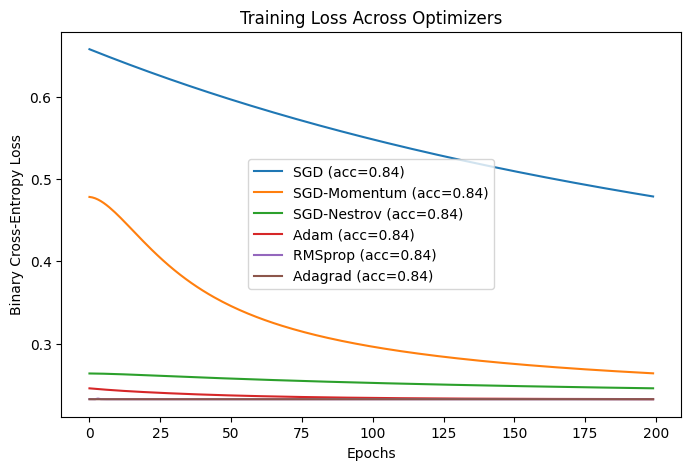

Final Test Accuracies:
SGD: 0.8350
SGD-Momentum: 0.8950
SGD-Nestrov: 0.8950
Adam: 0.9000
RMSprop: 0.9000
Adagrad: 0.9000


In [30]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Simulate a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_informative=2,
    random_state=42, n_clusters_per_class=1
)

# 2. Standardize and convert to tensors
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 3. Define forward pass manually
def logistic_forward(X, W, b):
    return torch.sigmoid(X @ W + b)

# 4. Define hard-coded binary cross-entropy loss
def binary_cross_entropy(y_pred, y_true):
    eps = 1e-8
    return -torch.mean(y_true * torch.log(y_pred + eps) + (1 - y_true) * torch.log(1 - y_pred + eps))

torch.manual_seed(42)
W = torch.randn((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# 5. Training function with minimal default functions
def train_model(optimizer_name, lr=0.01, epochs=200):

    if optimizer_name == 'SGD':
        optimizer = optim.SGD([W, b], lr=lr)
    elif optimizer_name == 'SGD-Momentum':
        optimizer = optim.SGD([W, b], lr=lr, momentum=0.9) 
    elif optimizer_name == 'SGD-Nestrov':
        optimizer = optim.SGD([W, b], lr=lr, momentum=0.9, nesterov=True)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam([W, b], lr=lr)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop([W, b], lr=lr)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad([W, b], lr=lr)
    else:
        raise ValueError("Unsupported optimizer")

    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = logistic_forward(X_train, W, b)
        loss = binary_cross_entropy(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

# 6. Compare optimizers
optimizers = ['SGD', 'SGD-Momentum', 'SGD-Nestrov', 'Adam', 'RMSprop', 'Adagrad']
results = {}
y_pred_mat = {}

plt.figure(figsize=(8,5))
for opt in optimizers:
    losses = train_model(opt)
    plt.plot(losses, label=f"{opt} (acc={acc:.2f})")

    with torch.no_grad():
        y_pred_test = logistic_forward(X_test, W, b)
        y_pred_label = (y_pred_test > 0.5).float()
        accuracy = (y_pred_label.eq(y_test).sum().item()) / len(y_test)

    y_pred_mat[opt] = y_pred_label
    results[opt] = accuracy

plt.title("Training Loss Across Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.legend()
plt.show()

print("Final Test Accuracies:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


In [32]:
y_pred_mat['SGD']

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
      

In [34]:
y_pred_mat['SGD-Nestrov']

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [36]:
import os

In [38]:
os.getcwd()

'C:\\Users\\ark007'